In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Finished Paths

In [2]:
# Load the finished_paths from tsv file
file = "data/wikispeedia_paths-and-graph/paths_finished.tsv"
"""
# Successful (i.e., finished) Wikispeedia paths.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# Articles in a path are separated by ";".
# Back clicks are represented as "<".
# Ratings are optionally given by the user after finishing the game and range from 1 ("easy") to 5 ("brutal").
# Missing ratings are represented as "NULL".
# FORMAT:   hashedIpAddress   timestamp   durationInSec   path   rating
#
# When publishing on this data set, please cite:
# (1) Robert West and Jure Leskovec:
#     Human Wayfinding in Information Networks.
#     21st International World Wide Web Conference (WWW), 2012.
# (2) Robert West, Joelle Pineau, and Doina Precup:
#     Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts.
#     21st International Joint Conference on Artificial Intelligence (IJCAI), 2009.
"""
finished_paths = pd.read_csv(file, sep="\t", header=None, comment="#")
finished_paths.columns = ["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"]
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


In [3]:
finished_paths["rating"] = finished_paths["rating"].fillna(-1)
# Changes nothing as the only missing values are now -1
#finished_paths = finished_paths.dropna()
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,-1.0
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,-1.0
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,-1.0
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,-1.0
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,-1.0
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


In [5]:
# Transform timestamp to datetime
finished_paths['timestamp'] =  finished_paths["timestamp"].apply(lambda x: pd.to_datetime(x, unit='s'))

# Split the path into a list
finished_paths["path"] = finished_paths["path"].apply(lambda x: x.split(";"))

# Count the number of clicks in each path (including back clicks)
finished_paths = finished_paths.assign(nb_clicks=finished_paths["path"].apply(lambda x: len(x)-1)) # -1 because we don't count the source article

# Count the number of back clicks in each path
finished_paths = finished_paths.assign(nb_back_clicks=finished_paths["path"].apply(lambda x: x.count("<")))

# Count the path length (excluding back clicks)
finished_paths = finished_paths.assign(path_length=finished_paths["nb_clicks"] - finished_paths["nb_back_clicks"])

# Convert the rating to int
finished_paths["rating"] = finished_paths["rating"].astype(int)

finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3
4,015245d773376aab,2013-04-23 15:27:08,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3,6,0,6
...,...,...,...,...,...,...,...,...
51313,15a13a1d66ef5456,2012-10-03 02:23:35,66,"[Yagan, Ancient_Egypt, Civilization]",-1,2,0,2
51314,2ef7ac844cefda58,2011-03-16 05:42:18,165,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent...",3,8,1,7
51315,12863abb7887f890,2013-11-22 04:42:52,228,"[Yagan, Australia, England, France, United_Sta...",-1,6,0,6
51316,19f8284371753362,2011-02-27 07:42:47,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1,3,0,3


In [6]:
finished_paths.describe()

,timestamp,durationInSec,rating,nb_clicks,nb_back_clicks,path_length
count,51318,51318.000000,51318.000000,51318.000000,51318.000000,51318.000000
mean,2011-01-30 10:32:41.107096832,158.276199,0.815971,5.757434,0.400659,5.356775
min,2008-08-18 21:29:32,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,2009-08-12 20:31:32,60.000000,-1.000000,4.000000,0.000000,3.000000
50%,2010-09-07 21:16:24.500000,107.000000,1.000000,5.000000,0.000000,5.000000
75%,2012-08-17 19:24:26.249999872,183.000000,2.000000,7.000000,0.000000,6.000000
max,2014-01-15 22:00:50,35091.000000,5.000000,434.000000,45.000000,419.000000
std,NaN,360.841904,1.823442,4.680718,1.451216,3.775778


In [7]:
duration_mask = finished_paths["durationInSec"] == 0
finished_paths[duration_mask]

# Gives same result as above
length_mask = finished_paths["path_length"] == 0
finished_paths[length_mask]

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length
5857,43f864c75b2571b5,2012-10-18 19:10:01,0,[Lesotho],-1,0,0,0
9589,5590014e126275b4,2008-11-03 07:19:15,0,[Moon],-1,0,0,0
9872,43f864c75b2571b5,2012-10-18 19:09:55,0,[Coal],-1,0,0,0
20919,43f864c75b2571b5,2012-10-18 19:09:49,0,[Pyramid],-1,0,0,0
23347,321e4b101c5b58ff,2008-11-03 15:37:40,0,[Apple],-1,0,0,0
24326,43f864c75b2571b5,2012-10-18 19:09:37,0,[Snow_Goose],-1,0,0,0
30761,43f864c75b2571b5,2012-10-18 19:10:20,0,[Royal_Navy],-1,0,0,0
33832,43f864c75b2571b5,2012-10-18 19:09:27,0,[Abel_Tasman],-1,0,0,0
34302,43f864c75b2571b5,2012-10-18 19:10:07,0,[American_Samoa],-1,0,0,0
38927,43f864c75b2571b5,2012-10-18 19:09:43,0,[Florence_Nightingale],-1,0,0,0


In [8]:
# Remove the paths with a duration of 0 (target=source)
finished_paths = finished_paths[~duration_mask]
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3
4,015245d773376aab,2013-04-23 15:27:08,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3,6,0,6
...,...,...,...,...,...,...,...,...
51313,15a13a1d66ef5456,2012-10-03 02:23:35,66,"[Yagan, Ancient_Egypt, Civilization]",-1,2,0,2
51314,2ef7ac844cefda58,2011-03-16 05:42:18,165,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent...",3,8,1,7
51315,12863abb7887f890,2013-11-22 04:42:52,228,"[Yagan, Australia, England, France, United_Sta...",-1,6,0,6
51316,19f8284371753362,2011-02-27 07:42:47,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1,3,0,3


In [9]:
finished_paths[finished_paths["path_length"] == 419]

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length
8046,7f6da01d55086766,2009-07-30 04:34:07,2205,"[United_States, Washington%2C_D.C., Government...",5,434,15,419


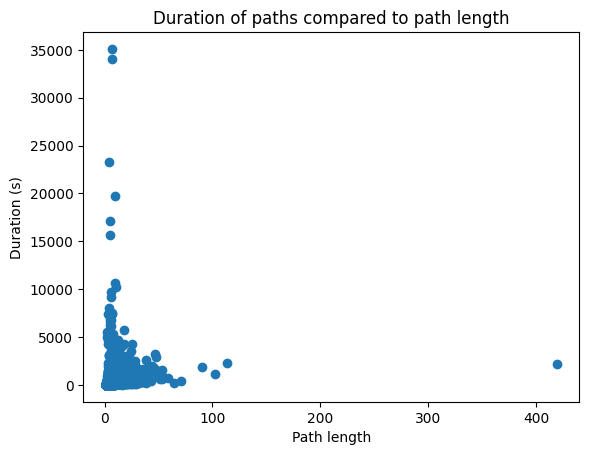

In [10]:
# Compare duration of paths with path length
plt.scatter(finished_paths["path_length"], finished_paths["durationInSec"])
plt.xlabel("Path length")
plt.ylabel("Duration (s)")
plt.title("Duration of paths compared to path length")
plt.show()

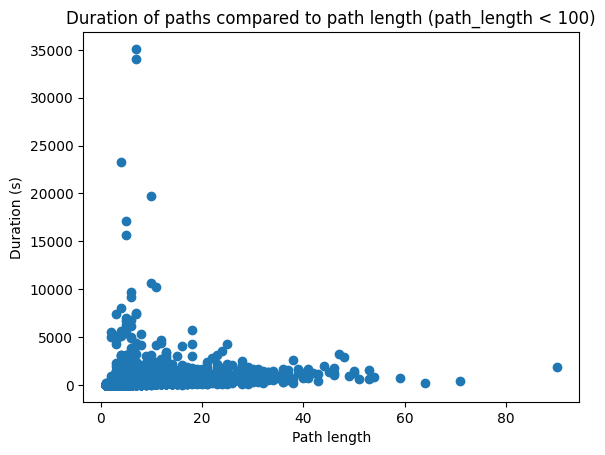

In [11]:
mask = finished_paths["path_length"] < 100
plt.scatter(finished_paths[mask]["path_length"], finished_paths[mask]["durationInSec"])
plt.xlabel("Path length")
plt.ylabel("Duration (s)")
plt.title("Duration of paths compared to path length (path_length < 100)")
plt.show()

## Unfinished Paths

In [12]:
unfinished_paths = pd.read_csv("data/wikispeedia_paths-and-graph/paths_unfinished.tsv", sep='\t', header=None, comment="#")

"""
# Unsuccessful (i.e., unfinished) Wikispeedia paths.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# Articles in a path are separated by ";".
# Back clicks are represented as "<".
# There are two types of quitting:
# (1) "timeout" means that no click was made for 30 minutes;
# (2) "restart" means that the user started a new game without finishing the current one.
# FORMAT:   hashedIpAddress   timestamp   durationInSec   path   target   type
#
# When publishing on this data set, please cite:
# (1) Robert West and Jure Leskovec:
#     Human Wayfinding in Information Networks.
#     21st International World Wide Web Conference (WWW), 2012.
# (2) Robert West, Joelle Pineau, and Doina Precup:
#     Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts.
#     21st International Joint Conference on Artificial Intelligence (IJCAI), 2009."""

unfinished_paths.columns = ["hashedIpAddress", "timestamp", "durationInSec", "path", "target", "type"]
unfinished_paths

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


In [13]:
# Transform timestamp to datetime
unfinished_paths['timestamp'] =  unfinished_paths["timestamp"].apply(lambda x: pd.to_datetime(x, unit='s'))

# Split the path into a list
unfinished_paths["path"] = unfinished_paths["path"].apply(lambda x: x.split(";"))

# Count the number of clicks in each path (including back clicks)
unfinished_paths["nb_clicks"] = unfinished_paths["path"].apply(lambda x: len(x) - 1) # -1 because we don't count the source article

# Count the number of back clicks in each path
unfinished_paths["nb_back_clicks"] = unfinished_paths["path"].apply(lambda x: x.count("<"))

# Count the path length (excluding back clicks)
unfinished_paths["path_length"] = unfinished_paths["nb_clicks"] - unfinished_paths["nb_back_clicks"]

# Create a column containing the play duration
unfinished_paths["play_duration"] = unfinished_paths["durationInSec"]

# Remove 1800 seconds from the play duration if the type is timeout and assign the result to the play duration
unfinished_paths.loc[unfinished_paths["type"] == "timeout", "play_duration"] = unfinished_paths.loc[unfinished_paths["type"] == "timeout", "play_duration"].apply(lambda x: max(x - 1800, 0)) # ensures that the play duration is not negative

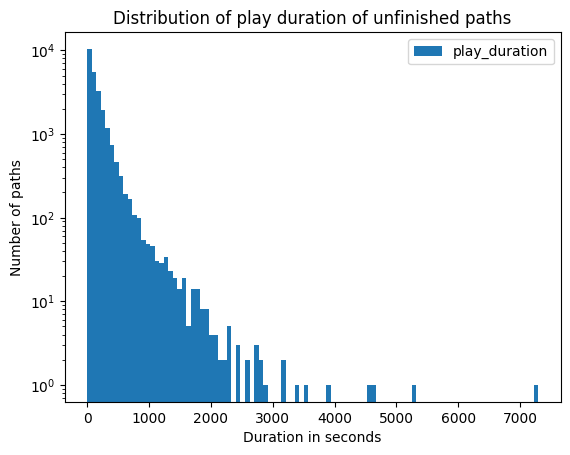

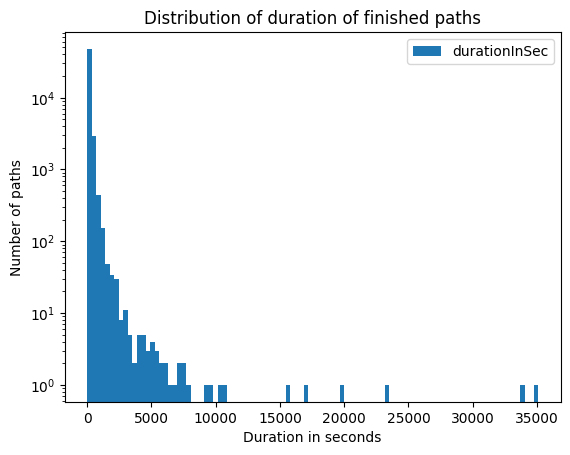

In [14]:
unfinished_paths.plot.hist(y="play_duration", bins=100, title="Distribution of play duration of unfinished paths", xlabel="Duration in seconds", ylabel="Number of paths", log=True)
plt.show()
finished_paths.plot.hist(y="durationInSec", bins=100, title="Distribution of duration of finished paths", xlabel="Duration in seconds", ylabel="Number of paths", log=True)
plt.show()

## Categories

In [19]:
"""
# Hierarchical categories of all articles.
# Many articles have more than one category. Some articles have no category.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   article   category
#
# When publishing on this data set, please cite:
# (1) Robert West and Jure Leskovec:
#     Human Wayfinding in Information Networks.
#     21st International World Wide Web Conference (WWW), 2012.
# (2) Robert West, Joelle Pineau, and Doina Precup:
#     Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts.
#     21st International Joint Conference on Artificial Intelligence (IJCAI), 2009."""


categories = pd.read_csv("./data/wikispeedia_paths-and-graph/categories.tsv", sep='\t', header=None, comment="#")
categories.columns = ["article", "category"]
categories["category"] = categories["category"].apply(lambda x: x.split(".")[1:])
categories

,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,"[History, British_History, British_History_150..."
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,"[People, Historical_figures]"
2,%C3%85land,[Countries]
3,%C3%85land,"[Geography, European_Geography, European_Count..."
4,%C3%89douard_Manet,"[People, Artists]"
...,...,...
5199,Zirconium,"[Science, Chemistry, Chemical_elements]"
5200,Zoroaster,"[People, Religious_figures_and_leaders]"
5201,Zuid-Gelders,"[Geography, European_Geography]"
5202,Zuid-Gelders,"[Language_and_literature, Languages]"


In [20]:
def compare_categories(category1, category2):
    return len(set(category1).intersection(set(category2)))

In [21]:
# Get source and target articles for each path
unfinished_paths["source"] = unfinished_paths["path"].apply(lambda x: x[0])
finished_paths["source"] = finished_paths["path"].apply(lambda x: x[0])
finished_paths["target"] = finished_paths["path"].apply(lambda x: x[-1])

C:\Users\lysan\AppData\Local\Temp\ipykernel_6240\219846321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finished_paths["source"] = finished_paths["path"].apply(lambda x: x[0])
C:\Users\lysan\AppData\Local\Temp\ipykernel_6240\219846321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finished_paths["target"] = finished_paths["path"].apply(lambda x: x[-1])


In [22]:
# Get the categories of the source and target articles for each path
unfinished_paths = unfinished_paths.merge(categories, left_on="source", right_on="article").rename(columns={"category": "source_category"})
unfinished_paths = unfinished_paths.merge(categories, left_on="target", right_on="article").rename(columns={"category": "target_category"})
finished_paths = finished_paths.merge(categories, left_on="source", right_on="article").rename(columns={"category": "source_category"})
finished_paths = finished_paths.merge(categories, left_on="target", right_on="article").rename(columns={"category": "target_category"})
unfinished_paths.drop(columns=["article_x", "article_y"], inplace=True)
finished_paths.drop(columns=["article_x", "article_y"], inplace=True)

In [23]:
unfinished_paths

,hashedIpAddress,timestamp,durationInSec,path,target,type,nb_clicks,nb_back_clicks,path_length,play_duration,source,source_category,target_category
0,2426091a53125110,2011-02-07 05:02:15,1804,[Obi-Wan_Kenobi],Microsoft,timeout,0,0,0,4,Obi-Wan_Kenobi,"[Everyday_life, Films]","[Business_Studies, Companies]"
1,2426091a53125110,2011-02-07 05:02:15,1804,[Obi-Wan_Kenobi],Microsoft,timeout,0,0,0,4,Obi-Wan_Kenobi,"[Everyday_life, Films]","[IT, Software]"
2,26141fd878806294,2011-02-07 05:14:11,1805,[Julius_Caesar],Caracas,timeout,0,0,0,5,Julius_Caesar,"[People, Historical_figures]","[Geography, Central_and_South_American_Geography]"
3,2b015fb8181c48f2,2011-02-07 15:00:19,1818,"[Malawi, Democracy, Alexander_the_Great]",First_Crusade,timeout,2,0,2,18,Malawi,"[Geography, African_Geography, African_Countries]","[History, Pre_1900_Military]"
4,2b015fb8181c48f2,2011-02-07 15:00:19,1818,"[Malawi, Democracy, Alexander_the_Great]",First_Crusade,timeout,2,0,2,18,Malawi,"[Geography, African_Geography, African_Countries]","[Religion, Religious_disputes]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,232f992e57d43e8d,2014-01-15 12:08:17,6,[Modern_history],Hollandic,restart,0,0,0,6,Modern_history,"[History, General_history]","[Language_and_literature, Languages]"
33534,2e09a7224600a7cd,2014-01-15 15:06:40,1900,"[Computer_programming, Linguistics, Culture, P...",The_Beatles,timeout,4,1,3,100,Computer_programming,"[IT, Computer_Programming]","[Music, Performers_and_composers]"
33535,60af9e2138051b96,2014-01-15 15:24:41,1903,"[Jamaica, United_Kingdom, World_War_II, Battle...",Alan_Turing,timeout,3,0,3,103,Jamaica,"[Geography, Central_and_South_American_Geograp...","[People, Mathematicians]"
33536,60af9e2138051b96,2014-01-15 15:24:41,1903,"[Jamaica, United_Kingdom, World_War_II, Battle...",Alan_Turing,timeout,3,0,3,103,Jamaica,[Countries],"[People, Mathematicians]"


In [24]:
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",-1,8,0,8,14th_century,African_slave_trade,"[History, General_history]","[History, General_history]"
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3,4,0,4,14th_century,African_slave_trade,"[History, General_history]","[History, General_history]"
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",-1,7,0,7,14th_century,African_slave_trade,"[History, General_history]","[History, General_history]"
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"[History, General_history]",[Countries]
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",-1,3,0,3,14th_century,Greece,"[History, General_history]","[Geography, European_Geography, European_Count..."
...,...,...,...,...,...,...,...,...,...,...,...,...
70855,15a13a1d66ef5456,2012-10-03 02:23:35,66,"[Yagan, Ancient_Egypt, Civilization]",-1,2,0,2,Yagan,Civilization,"[People, Historical_figures]","[Citizenship, Culture_and_Diversity]"
70856,2ef7ac844cefda58,2011-03-16 05:42:18,165,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent...",3,8,1,7,Yagan,Fiction,"[People, Historical_figures]","[Language_and_literature, Literature_types]"
70857,12863abb7887f890,2013-11-22 04:42:52,228,"[Yagan, Australia, England, France, United_Sta...",-1,6,0,6,Yagan,U.S._Open_%28tennis%29,"[People, Historical_figures]","[Everyday_life, Sports_events]"
70858,19f8284371753362,2011-02-27 07:42:47,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1,3,0,3,Yarralumla%2C_Australian_Capital_Territory,Abraham_Lincoln,"[Geography, Geography_of_Oceania_Australasia]","[People, USA_Presidents]"


In [25]:
categories.to_csv("clean_categories.csv", index=False)
finished_paths.to_csv("clean_finished_paths.csv", index=False)
unfinished_paths.to_csv("clean_unfinished_paths.csv", index=False)